In [197]:
zoom_in_timestamps = pd.read_pickle(os.path.join(zoom_in_folder,'1288694825_timestamps.pkl'))
zoom_in_timestamps.keys()

Index(['ophys_frames'], dtype='object')

In [308]:

f.close()

/tmp/ipykernel_1328/2166366447.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(os.path.join(zoom_out_folder,'1285289905_roi_traces.h5'))#f = h5py.File(


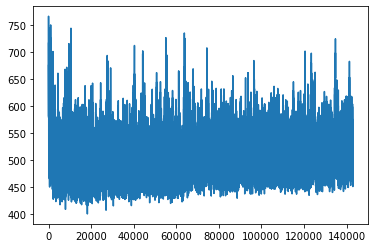

In [323]:
plt.plot(raw_F[13,:])

In [381]:
import h5py
import BCI_analysis
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
zoom_out_folder = '/home/jupyter/bucket/Data/temp/snr_zoom/1285211664/'
zoom_out_roi_table = pd.read_pickle(os.path.join(zoom_out_folder,'1285289905_roi_table.pkl'))
zoom_out_dff_table = pd.read_pickle(os.path.join(zoom_out_folder,'1285289905_dff_table.pkl'))
zoom_out_timestamps = pd.read_pickle(os.path.join(zoom_out_folder,'1285289905_timestamps.pkl'))
f = h5py.File(os.path.join(zoom_out_folder,'1285289905_roi_traces.h5'))#f = h5py.File(
raw_roi_names_out = f['roi_names'][:]
raw_F_out = f['data'][:]
f.close()
f = h5py.File(os.path.join(zoom_out_folder,'1285289905_neuropil_traces.h5'))#f = h5py.File(
raw_neuropil_F_out = f['data'][:]
f.close()

stim_frame_time = zoom_out_timestamps['stimulus_frames'].values[0][0]
zoom_out_timestamps = zoom_out_timestamps['ophys_frames'].values[0]
zoom_out_timestamps = zoom_out_timestamps-zoom_out_timestamps[0]
zoom_out_stim_idx = np.argmin(np.abs(zoom_out_timestamps - stim_frame_time))
frame_rate_zoom_out = float(pd.read_csv(os.path.join(zoom_out_folder,'frame_rate.txt')).keys()[0])

zoom_in_folder = '/home/jupyter/bucket/Data/temp/snr_zoom/1288548104/'
zoom_in_roi_table = pd.read_pickle(os.path.join(zoom_in_folder,'1288694825_roi_table.pkl'))
zoom_in_dff_table = pd.read_pickle(os.path.join(zoom_in_folder,'1288694825_dff_table.pkl'))
zoom_in_timestamps = pd.read_pickle(os.path.join(zoom_in_folder,'1288694825_timestamps.pkl'))
f = h5py.File(os.path.join(zoom_in_folder,'1288694825_roi_traces.h5'))#f = h5py.File(
raw_roi_names_in = f['roi_names'][:]
raw_F_in = f['data'][:]
f.close()
f = h5py.File(os.path.join(zoom_in_folder,'1288694825_neuropil_traces.h5'))#f = h5py.File(
raw_neuropil_F_in = f['data'][:]
f.close()
#stim_frame_time = zoom_in_timestamps['stimulus_frames'].values[0][0] # no optical stim??
zoom_in_timestamps = zoom_in_timestamps['ophys_frames'].values[0]
zoom_in_timestamps = zoom_in_timestamps-zoom_in_timestamps[0]
#zoom_in_stim_idx = np.argmin(np.abs(zoom_in_timestamps - stim_frame_time))
frame_rate_zoom_in = float(pd.read_csv(os.path.join(zoom_in_folder,'frame_rate.txt')).keys()[0])
cell_id_zoom_in = [140,144,134,143,139,135,137,142,136,130,138,131]
cell_id_zoom_out = [57,68,46,72,63,45,78,27,56,31,64,41]



/tmp/ipykernel_1328/2707886431.py:11: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(os.path.join(zoom_out_folder,'1285289905_roi_traces.h5'))#f = h5py.File(
/tmp/ipykernel_1328/2707886431.py:15: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(os.path.join(zoom_out_folder,'1285289905_neuropil_traces.h5'))#f = h5py.File(
/tmp/ipykernel_1328/2707886431.py:29: H

In [282]:
mask.shape

(512, 512)

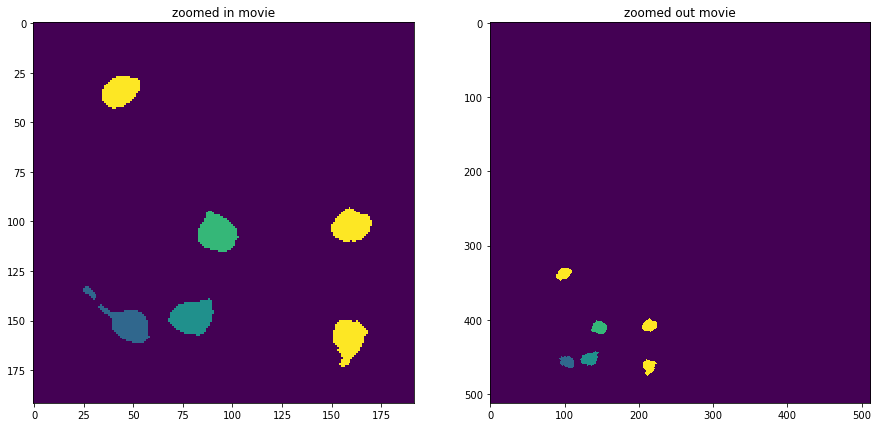

In [325]:
# confirm that the ROIs match - and locate only VALID ROIS
mask_all_zoom_in = zoom_in_roi_table['full_frame_mask'][0]*0
mask_all_zoom_out = zoom_out_roi_table['full_frame_mask'][0]*0
cell_id_zoom_in_real = []
cell_id_zoom_out_real = []
pixel_num_list_in = []
pixel_num_list_out = []
for mask_i, (zoom_in_idx,zoom_out_idx) in enumerate(zip(cell_id_zoom_in,cell_id_zoom_out)):
    if not (zoom_out_roi_table['valid_roi'][zoom_out_idx] and zoom_in_roi_table['valid_roi'][zoom_in_idx]):
        continue
    mask = zoom_in_roi_table['full_frame_mask'][zoom_in_idx]
    pixel_num_list_in.append(np.sum(mask))
    mask_all_zoom_in+=mask*(mask_i+1)
    mask = zoom_out_roi_table['full_frame_mask'][zoom_out_idx]
    pixel_num_list_out.append(np.sum(mask))
    mask_all_zoom_out+=mask*(mask_i+1)
    cell_id_zoom_in_real.append(zoom_in_idx)
    cell_id_zoom_out_real.append(zoom_out_idx)
    
cell_id_zoom_in = cell_id_zoom_in_real
cell_id_zoom_out = cell_id_zoom_out_real
fig = plt.figure(figsize = [15,15])
ax_zoom_in = fig.add_subplot(1,2,1)
im_in = ax_zoom_in.imshow(mask_all_zoom_in,interpolation = 'none')
ax_zoom_in.set_title('zoomed in movie')
ax_zoom_out = fig.add_subplot(1,2,2)
im_out = ax_zoom_out.imshow(mask_all_zoom_out,interpolation = 'none')
ax_zoom_out.set_title('zoomed out movie')
im_in.set_clim([0,len(cell_id_zoom_in)])
im_out.set_clim([0,len(cell_id_zoom_in)])


roi_id_lims_zoom_in = zoom_in_roi_table['id'][cell_id_zoom_in]
roi_id_lims_zoom_out = zoom_out_roi_table['id'][cell_id_zoom_out]

(0.0, 500.0)

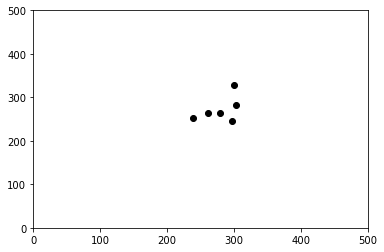

In [290]:
plt.plot(pixel_num_list_in,pixel_num_list_out,'ko')
plt.xlim([0,500])
plt.ylim([0,500])

Text(0.5, 1.0, 'zoom out')

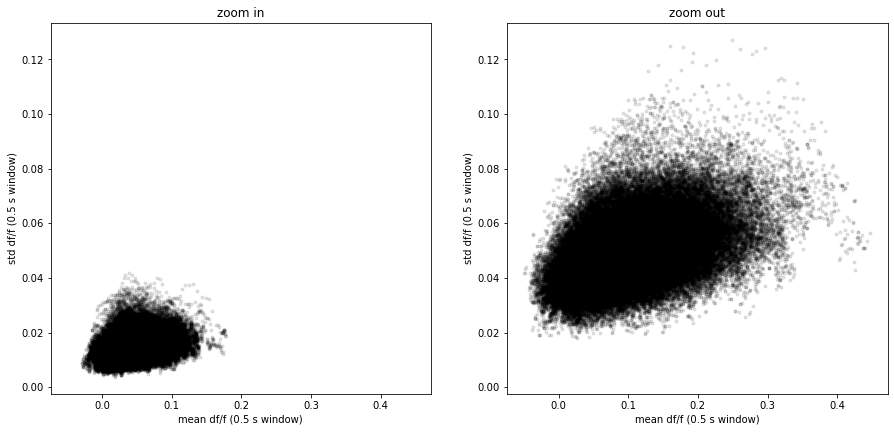

In [262]:
std_time_window = .5 #s
shot_noise_percentile = 10
zoom_in_std = BCI_analysis.plot_utils.rollingfun(dff_zoom_in,int(std_time_window*frame_rate_zoom_in/downsample),'std')
zoom_in_mean = BCI_analysis.plot_utils.rollingfun(dff_zoom_in,int(std_time_window*frame_rate_zoom_in/downsample),'mean')
zoom_out_std = BCI_analysis.plot_utils.rollingfun(dff_zoom_out,int(std_time_window*frame_rate_zoom_out),'std')
zoom_out_mean = BCI_analysis.plot_utils.rollingfun(dff_zoom_out,int(std_time_window*frame_rate_zoom_out),'mean')


fig = plt.figure(figsize = [15,15])
ax1 = fig.add_subplot(2,2,1)
ax1.plot(zoom_in_mean,zoom_in_std,'k.',alpha = .1)
ax1.set_xlabel('mean df/f ({} s window)'.format(std_time_window))
ax1.set_ylabel('std df/f ({} s window)'.format(std_time_window))
ax1.set_title('zoom in')
ax2 = fig.add_subplot(2,2,2,sharex = ax1,sharey = ax1)
ax2.plot(zoom_out_mean,zoom_out_std,'k.',alpha = .1)
ax2.set_xlabel('mean df/f ({} s window)'.format(std_time_window))
ax2.set_ylabel('std df/f ({} s window)'.format(std_time_window))
ax2.set_title('zoom out')
#plt.hist(zoom_in_std,100)
#asd

Text(0, 0.5, 'F0 to fneu ratio zoom out')

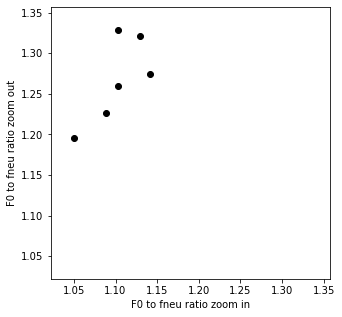

In [395]:
fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
ax.plot(f_to_fneu_ratio_in_list,f_to_fneu_ratio_out_list,'ko')
limits = np.percentile(np.concatenate([f_to_fneu_ratio_in_list,f_to_fneu_ratio_out_list]),[0,100])
d = np.diff(limits)[0]*.1
limits[0]-=d
limits[1]+=d
ax.set_xlim(limits)
ax.set_ylim(limits)
ax.set_xlabel('F0 to fneu ratio zoom in')
ax.set_ylabel('F0 to fneu ratio zoom out')

Text(0, 0.5, 'zoom out')

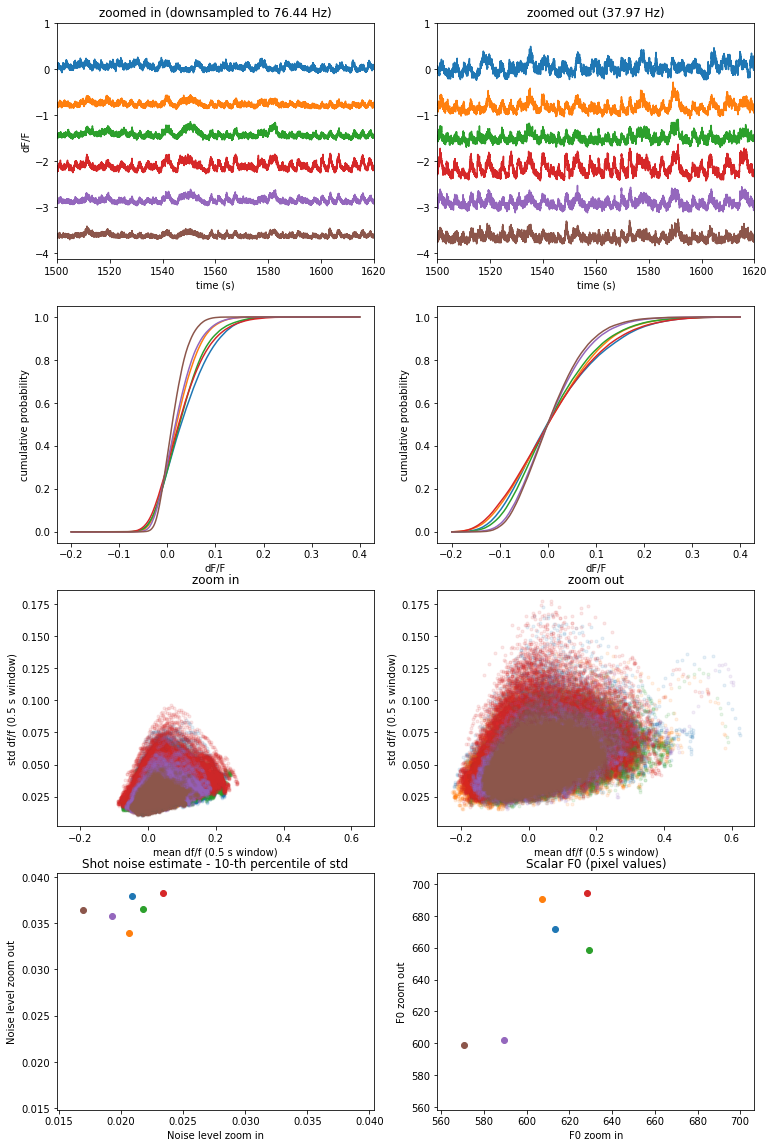

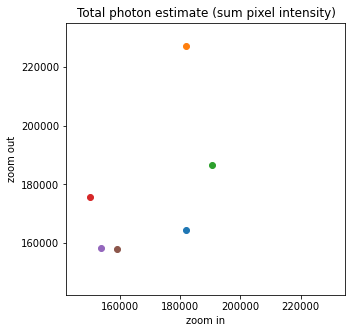

In [391]:
fig = plt.figure(figsize = [12.5,20])
dff_range = np.arange(-.2,.4,.001)
dff_range_plot =np.nanmean([dff_range[1:],dff_range[:-1]],0)
ax_dff_zoom_in = fig.add_subplot(4,2,1)
ax_dff_zoom_out = fig.add_subplot(4,2,2,sharex = ax_dff_zoom_in,sharey = ax_dff_zoom_in)

ax_dff_hist_in = fig.add_subplot(4,2,3)
ax_dff_hist_out = fig.add_subplot(4,2,4,sharex = ax_dff_hist_in,sharey = ax_dff_hist_in)


ax_mean_vs_std_in = fig.add_subplot(4,2,5)
ax_mean_vs_std_out = fig.add_subplot(4,2,6,sharex = ax_mean_vs_std_in,sharey = ax_mean_vs_std_in)
ax_mean_vs_std_in.set_xlabel('mean df/f ({} s window)'.format(std_time_window))
ax_mean_vs_std_in.set_ylabel('std df/f ({} s window)'.format(std_time_window))
ax_mean_vs_std_in.set_title('zoom in')
ax_mean_vs_std_out.set_xlabel('mean df/f ({} s window)'.format(std_time_window))
ax_mean_vs_std_out.set_ylabel('std df/f ({} s window)'.format(std_time_window))
ax_mean_vs_std_out.set_title('zoom out')






ax_shot_noise_estimate = fig.add_subplot(4,2,7)
ax_F0_levels = fig.add_subplot(4,2,8)

std_time_window = .5 #s
shot_noise_percentile = 10
rescale_dff = False
rescale_moving_window_filter = 10
rescale_percentiles = [3,97]

offset = 0
noise_level_list_zoom_in = []
noise_level_list_zoom_out = []
F0_scalar_zoom_in_list = []
F0_scalar_zoom_out_list = []
f_to_fneu_ratio_in_list = []
f_to_fneu_ratio_out_list = []

for mask_i, (zoom_in_idx,zoom_out_idx) in enumerate(zip(roi_id_lims_zoom_in,roi_id_lims_zoom_out)):
    dff_zoom_in = zoom_in_dff_table['dff'][np.asarray(zoom_in_dff_table.index,int)==zoom_in_idx].values[0]
    raw_in_idx = np.where(raw_roi_names_in == str(zoom_in_idx))[0][0]
    F_zoom_in = raw_F_in[raw_in_idx,:]
    Fneu_zoom_in = raw_neuropil_F_in[raw_in_idx,:]
    p = np.polyfit(dff_zoom_in,F_zoom_in,1)
    F0_scalar_zoom_in_list.append(p[1])#np.percentile(F_zoom_in,10))
    f_to_fneu_ratio_in_list.append(np.nanmean(p[1]/Fneu_zoom_in))
    dff_zoom_out = zoom_out_dff_table['dff'][np.asarray(zoom_out_dff_table.index,int)==zoom_out_idx].values[0]
    raw_out_idx = np.where(raw_roi_names_out == str(zoom_out_idx))[0][0]
    F_zoom_out = raw_F_out[raw_out_idx,:]
    Fneu_zoom_out = raw_neuropil_F_out[raw_out_idx,:]
    p = np.polyfit(dff_zoom_out,F_zoom_out,1)
    F0_scalar_zoom_out_list.append(p[1])#np.percentile(F_zoom_out,10))
    f_to_fneu_ratio_out_list.append(np.nanmean(p[1]/Fneu_zoom_out))
    
    
    
    y_in,x = np.histogram(BCI_analysis.plot_utils.rollingfun(dff_zoom_in,rescale_moving_window_filter),dff_range)
    y_out,x = np.histogram(BCI_analysis.plot_utils.rollingfun(dff_zoom_out,rescale_moving_window_filter),dff_range)
    
    ax_dff_hist_in.plot(dff_range_plot,np.cumsum(y_in)/np.sum(y_in))
    ax_dff_hist_out.plot(dff_range_plot,np.cumsum(y_out)/np.sum(y_out))
    
    if rescale_dff:
        limits_in = np.percentile(BCI_analysis.plot_utils.rollingfun(dff_zoom_in,rescale_moving_window_filter),rescale_percentiles)
        limits_out = np.percentile(BCI_analysis.plot_utils.rollingfun(dff_zoom_out,rescale_moving_window_filter),rescale_percentiles)
        dff_zoom_in -=limits_in[0]
        dff_zoom_in =dff_zoom_in/np.diff(limits_in)[0]
        dff_zoom_out -=limits_out[0]
        dff_zoom_out =dff_zoom_out/np.diff(limits_out)[0]
    
    
    
    
    dt_in = 1/frame_rate_zoom_in
    t_in = np.arange(len(dff_zoom_in))*dt_in
    
    dt_out = 1/frame_rate_zoom_out
    t_out = np.arange(len(dff_zoom_out))*dt_out
    
    
    downsample = 1#int(np.round(dt_out/dt_in))
    dff_zoom_in = BCI_analysis.plot_utils.rollingfun(dff_zoom_in,downsample)
    ax_dff_zoom_in.plot(t_in[::downsample],dff_zoom_in[::downsample]+offset)
    ax_dff_zoom_out.plot(t_out,dff_zoom_out+offset)
    offset -= np.max(np.concatenate([dff_zoom_in,dff_zoom_out]))
    
    zoom_in_std = BCI_analysis.plot_utils.rollingfun(dff_zoom_in,int(std_time_window*frame_rate_zoom_in/downsample),'std')
    zoom_in_mean = BCI_analysis.plot_utils.rollingfun(dff_zoom_in,int(std_time_window*frame_rate_zoom_in/downsample),'mean')
    zoom_out_std = BCI_analysis.plot_utils.rollingfun(dff_zoom_out,int(std_time_window*frame_rate_zoom_out),'std')
    zoom_out_mean = BCI_analysis.plot_utils.rollingfun(dff_zoom_out,int(std_time_window*frame_rate_zoom_out),'mean')
    
    noise_level_list_zoom_in.append(np.percentile(zoom_in_std,shot_noise_percentile))
    noise_level_list_zoom_out.append(np.percentile(zoom_out_std,shot_noise_percentile))
    ax_mean_vs_std_in.plot(zoom_in_mean,zoom_in_std,'.',alpha = .1)
    ax_mean_vs_std_out.plot(zoom_out_mean,zoom_out_std,'.',alpha = .1)
    
    #asd
ax_dff_zoom_in.set_title('zoomed in (downsampled to {} Hz)'.format(frame_rate_zoom_in/downsample))
ax_dff_zoom_out.set_title('zoomed out ({} Hz)'.format(frame_rate_zoom_out))
ax_dff_zoom_out.set_xlim([1500,1620])
ax_dff_zoom_out.set_xlabel('time (s)')
ax_dff_zoom_in.set_xlabel('time (s)')
if rescale_dff:
    ax_dff_zoom_in.set_ylabel('dF/F (rescaled)')
else:
    ax_dff_zoom_in.set_ylabel('dF/F')

ax_dff_hist_out.set_xlabel('dF/F')
ax_dff_hist_out.set_ylabel('cumulative probability')
ax_dff_hist_in.set_xlabel('dF/F')
ax_dff_hist_in.set_ylabel('cumulative probability')

for i,o in zip(noise_level_list_zoom_in,noise_level_list_zoom_out):
    ax_shot_noise_estimate.plot(i,o,'o')
limits = np.percentile(np.concatenate([noise_level_list_zoom_in,noise_level_list_zoom_out]),[0,100])
d = np.diff(limits)[0]*.1
limits[0]-=d
limits[1]+=d
ax_shot_noise_estimate.set_xlim(limits)
ax_shot_noise_estimate.set_ylim(limits)
ax_shot_noise_estimate.set_title('Shot noise estimate - {}-th percentile of std'.format(shot_noise_percentile))
ax_shot_noise_estimate.set_xlabel('Noise level zoom in')
ax_shot_noise_estimate.set_ylabel('Noise level zoom out')



for i,o in zip(F0_scalar_zoom_in_list,F0_scalar_zoom_out_list):
    ax_F0_levels.plot(i,o,'o')
limits = np.percentile(np.concatenate([F0_scalar_zoom_in_list,F0_scalar_zoom_out_list]),[0,100])
d = np.diff(limits)[0]*.1
limits[0]-=d
limits[1]+=d
ax_F0_levels.set_xlim(limits)
ax_F0_levels.set_ylim(limits)
ax_F0_levels.set_title('Scalar F0 (pixel values)')
ax_F0_levels.set_xlabel('F0 zoom in')
ax_F0_levels.set_ylabel('F0 zoom out')


total_photon_in = np.asarray(pixel_num_list_in)*np.asarray(F0_scalar_zoom_in_list)
total_photon_out = np.asarray(pixel_num_list_out)*np.asarray(F0_scalar_zoom_out_list)
fig = plt.figure(figsize = [5,5])
ax_total_photon_estimate = fig.add_subplot(1,1,1)

for i,o in zip(total_photon_in,total_photon_out):
    ax_total_photon_estimate.plot(i,o,'o')
limits = np.percentile(np.concatenate([total_photon_in,total_photon_out]),[0,100])
d = np.diff(limits)[0]*.1
limits[0]-=d
limits[1]+=d
ax_total_photon_estimate.set_xlim(limits)
ax_total_photon_estimate.set_ylim(limits)
ax_total_photon_estimate.set_title('Total photon estimate (sum pixel intensity)')
ax_total_photon_estimate.set_xlabel('zoom in')
ax_total_photon_estimate.set_ylabel('zoom out')


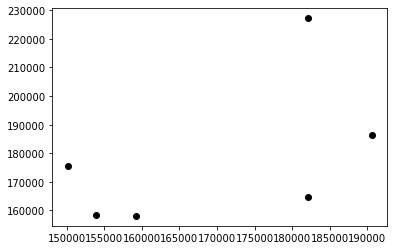

In [375]:
plt.plot(total_photon_in,total_photon_out,'ko')

(500.0, 700.0)

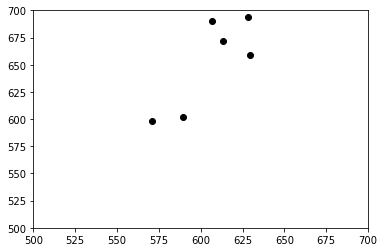

In [368]:
plt.plot(F0_scalar_zoom_in_list,F0_scalar_zoom_out_list,'ko')
plt.xlim([500,700])
plt.ylim([500,700])

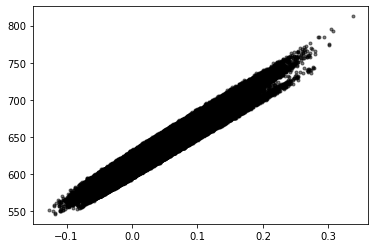

In [357]:
plt.plot(dff_zoom_in,F_zoom_in,'k.',alpha = .5)

671.8529224296467

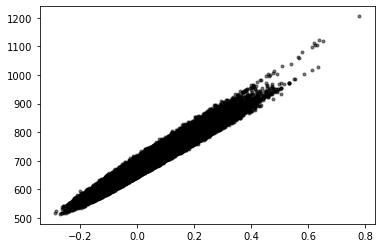

In [358]:
plt.plot(dff_zoom_out,F_zoom_out,'k.',alpha = .5)

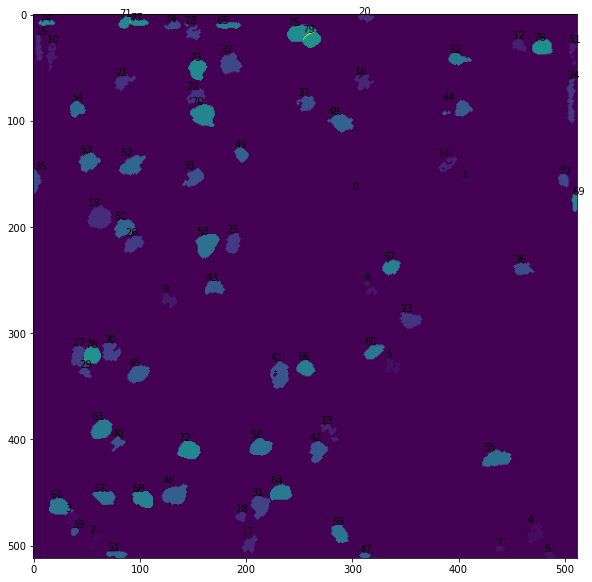

In [24]:
mask_all = zoom_out_roi_table['full_frame_mask'][0]*0
for mask_i, mask in enumerate(zoom_out_roi_table['full_frame_mask']):
    mask_all+=mask*(mask_i+1)

fig = plt.figure(figsize = [10,10])
plt.imshow(mask_all)
for mask_i, (x,y) in enumerate(zip(zoom_out_roi_table['x'],zoom_out_roi_table['y'])):
    plt.text(x,y,mask_i)